In [10]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import Series
from numpy import nan
import matplotlib.pyplot as plt
import random as rand
from collections import defaultdict
from collections import Counter
%matplotlib inline 
plt.style.use('ggplot')

In [3]:
rand.randint(1,100)

95

Following the description in Classnotes 1 on Empirical Method of Gene Mapping:
Direct-IBD Mapping (Cheung et al. 1998) write a computer code or function that can
calculate and draw the frequency table and histogram for Gene Mapping. The input
of the function should be length of the DNA sequence (L), number of fragments,
length of each fragment (ij), and number of Monte Carlo samples. Based on these
the computer program should output the frequency table and the histogram
representing the empirical distribution of M (the maximum number of overlap).
Make the computer code as much user friendly as possible. (50 points)

In [4]:
overlap = defaultdict(int)

In [5]:
overlap[10]

0

In [6]:
segments = [8,6,6,5,5,5,4]

In [7]:
def overlap_matcher(segmentlist,length):
    overlap = defaultdict(int) #this intializes an object that will store counts for corresponding values of L
    for i in segmentlist:
        start = rand.randint(1,length-i) #finds a random start point for one of the segments across the possible allignments
        #print range(start,i+start),i
        for k in range(start,i+start): # given the placement of the fragment (at position start) for the length(i) of the fragment, add to the count at that position
            overlap[k] +=1
    #print overlap.items()
    return max(overlap.values())#gives the highest value of the places where overlaps exist

In [8]:
trials = []
for i in range(10000): #repeats this function 10000 times and stores the resulting top value M
    trials.append(overlap_matcher(segments,100))

In [11]:
Counter(trials)

Counter({2: 7232, 3: 1962, 1: 645, 4: 159, 5: 2})

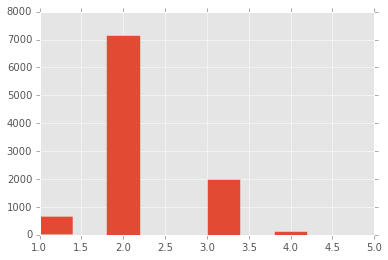

In [72]:
pd.Series(trials).hist() #creates a histogram of these values M. 

This data shows that with the short segment lengths sampled, we would not expect to see a greater than 3.0 as the maximum overlap in a sample very frequently. In fact 4 overlaps were less common than no overlaps at all. Therefore with this empircal input we would make a biological distinction between an empirical measurment of 6 and 3. Perhaps the sample with 6 has some evolutionary or even familial relationship. A sample with only 3 overlap maximum could happen over 20% of time purely by chance. 